In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

In [58]:
df = pd.read_csv('titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [59]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [60]:
X = df.drop(columns=['Survived'])
y = df.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [63]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [64]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [65]:
X_train['Age_Mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_Median'] = X_train['Age'].fillna(median_age)

X_train['Fare_Mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_Median'] = X_train['Fare'].fillna(median_fare)

In [66]:
X_train.sample(5)

Age     Fare  Family  Age_Mean  Age_Median  Fare_Mean  Fare_Median
482  50.0   8.0500       0      50.0        50.0     8.0500       8.0500
686  14.0  39.6875       5      14.0        14.0    39.6875      39.6875
234  24.0  10.5000       0      24.0        24.0    10.5000      10.5000
83   28.0  47.1000       0      28.0        28.0    47.1000      47.1000
81   29.0   9.5000       0      29.0        29.0     9.5000       9.5000

In [67]:
print('Original Age Variable Variance: ', X_train['Age'].var())
print('Age Variable Variance after Mean Imputation: ', X_train['Age_Mean'].var())
print('Age Variable Variance after Median Imputation: ', X_train['Age_Median'].var())
print()
print('Original Fare Variable Variance: ', X_train['Fare'].var())
print('Fare Variable Variance after Mean Imputation: ', X_train['Fare_Mean'].var())
print('Fare Variable Variance after Median Imputation: ', X_train['Fare_Median'].var())

Original Age Variable Variance:  210.2517072477438
Age Variable Variance after Mean Imputation:  168.8519336687225
Age Variable Variance after Median Imputation:  169.20731007048096

Original Fare Variable Variance:  2761.031434948639
Fare Variable Variance after Mean Imputation:  2621.2323749512393
Fare Variable Variance after Median Imputation:  2637.01248167777


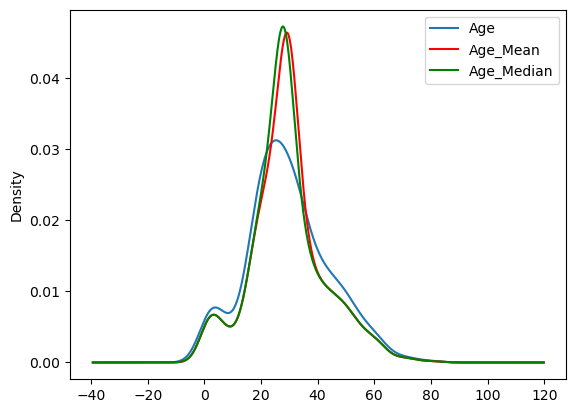

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_Mean'].plot(kind='kde', ax=ax, color='red')
                         
X_train['Age_Median'].plot(kind='kde', ax=ax, color='green')
                         
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

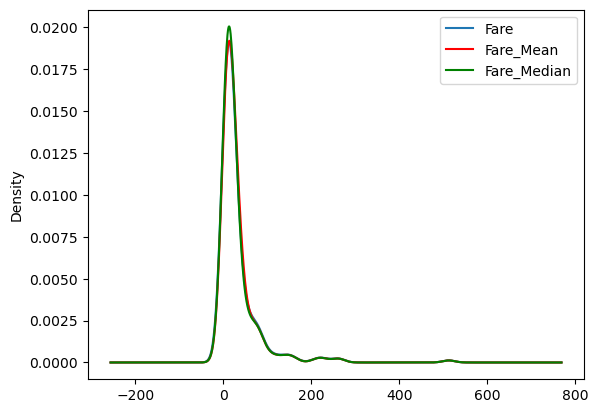

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_Mean'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_Median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [70]:
X_train.cov()

Age         Fare     Family    Age_Mean  Age_Median  \
Age          210.251707    75.481375  -6.993325  210.251707  210.251707   
Fare          75.481375  2761.031435  18.599163   60.224654   63.938058   
Family        -6.993325    18.599163   2.830892   -5.616299   -5.587710   
Age_Mean     210.251707    60.224654  -5.616299  168.851934  168.851934   
Age_Median   210.251707    63.938058  -5.587710  168.851934  169.207310   
Fare_Mean     71.193767  2761.031435  17.657433   57.175304   60.700688   
Fare_Median   70.082085  2761.031435  17.672035   56.282518   59.728510   

               Fare_Mean  Fare_Median  
Age            71.193767    70.082085  
Fare         2761.031435  2761.031435  
Family         17.657433    17.672035  
Age_Mean       57.175304    56.282518  
Age_Median     60.700688    59.728510  
Fare_Mean    2621.232375  2621.232375  
Fare_Median  2621.232375  2637.012482

In [71]:
X_train.corr()

Age      Fare    Family  Age_Mean  Age_Median  Fare_Mean  \
Age          1.000000  0.091482 -0.319651  1.000000    1.000000   0.088944   
Fare         0.091482  1.000000  0.207193  0.088151    0.093496   1.000000   
Family      -0.319651  0.207193  1.000000 -0.256883   -0.255307   0.204981   
Age_Mean     1.000000  0.088151 -0.256883  1.000000    0.998949   0.085941   
Age_Median   1.000000  0.093496 -0.255307  0.998949    1.000000   0.091145   
Fare_Mean    0.088944  1.000000  0.204981  0.085941    0.091145   1.000000   
Fare_Median  0.087232  1.000000  0.204536  0.084346    0.089416   0.997003   

             Fare_Median  
Age             0.087232  
Fare            1.000000  
Family          0.204536  
Age_Mean        0.084346  
Age_Median      0.089416  
Fare_Mean       0.997003  
Fare_Median     1.000000

<Axes: >

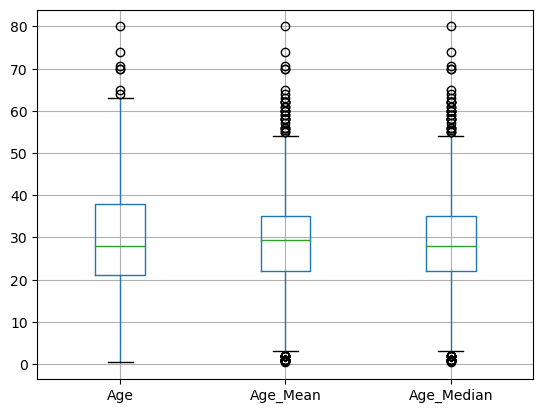

In [72]:
X_train[['Age', 'Age_Mean', 'Age_Median']].boxplot()

<Axes: >

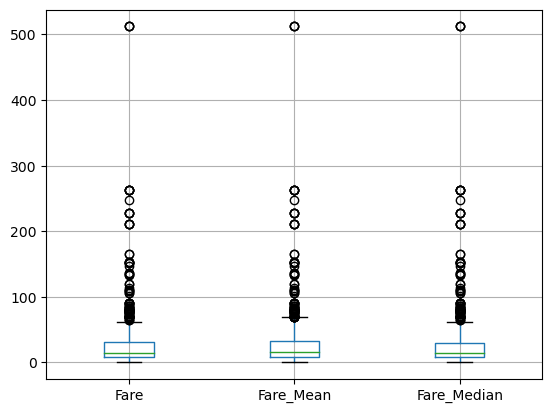

In [73]:
X_train[['Fare', 'Fare_Mean', 'Fare_Median']].boxplot()

# Using Sklean 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
Median_imputer = SimpleImputer(strategy='median')
Mean_imputer = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
    ('imputer1', Median_imputer, ['Age']),
    ('imputer2', Mean_imputer, ['Fare'])
], remainder='passthrough')

In [81]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [82]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [83]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [84]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [85]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])